In [9]:
%config InlineBackend.figure_format = 'retina'
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

In [10]:
alphaList = "-0.8 -0.6 -0.4 -0.2 +0.0 +0.2 +0.4 +0.6 +0.8".split()
alphaListNum = [float(alpha) for alpha in alphaList]

In [11]:
# read SCF
scf = []
target = 0
check = False
alpha0 = 8.340
for alpha in alphaList:
    if alpha == "+0.0":
        scf.append(alpha0)
        continue
    filename = "OUTCAR.V={}".format(alpha)
    with open(filename, 'r') as f:
        lines = f.readlines()
        length = len(lines)
        # 找到轨道电子数的位置
        for i in range(length):
            if "total charge" in lines[i]:
                target = i
                for j in range(target, target+5):
                    if "# of ion" in lines[j]:
                        check = True
                        break
        if check:
            for i in range(target, target+10):
                line = lines[i].split()
                if len(line) == 0:
                    continue
                if line[0] == "1":
                    scf.append(float(line[3]))
                    break

# read NSCF
nscf = []
target = 0
check = False
for alpha in alphaList:
    if alpha == "+0.0":
        nscf.append(alpha0)
        continue
    filename = "OUTCAR.V={}.ICHARG=11".format(alpha)
    with open(filename, 'r') as f:
        lines = f.readlines()
        length = len(lines)
        # 找到轨道电子数的位置
        for i in range(length):
            if "total charge" in lines[i]:
                target = i
                for j in range(target, target+5):
                    if "# of ion" in lines[j]:
                        check = True
                        break
        if check:
            for i in range(target, target+10):
                line = lines[i].split()
                if len(line) == 0:
                    continue
                if line[0] == "1":
                    nscf.append(float(line[3]))
                    break

In [12]:
# 对两条直线进行拟合
# 1. 拟合SCF
x = np.array(alphaListNum)
y = np.array(scf)
z1 = np.polyfit(x, y, 1)
p1 = np.poly1d(z1) 
print("SCF: y=%.6fx+(%.6f)"%(z1[0],z1[1]))
# 2. 拟合NSCF
x = np.array(alphaListNum)
y = np.array(nscf)
z2 = np.polyfit(x, y, 1)
p2 = np.poly1d(z2)
print("NSCF: y=%.6fx+(%.6f)"%(z2[0],z2[1]))

SCF: y=0.129583x+(8.369667)
NSCF: y=0.901083x+(8.286222)


$$
U=\chi^{-1}-\chi_0^{-1} \approx\left(\frac{\partial N_I^{\mathrm{SCF}}}{\partial V_I}\right)^{-1}-\left(\frac{\partial N_I^{\mathrm{NSCF}}}{\partial V_I}\right)^{-1}
$$

In [13]:
# 计算U值
U = 1/z1[0] - 1/z2[0]
print("U = %.6f"%U)

U = 6.607267


In [14]:
p1(0.1)

8.382625000000003

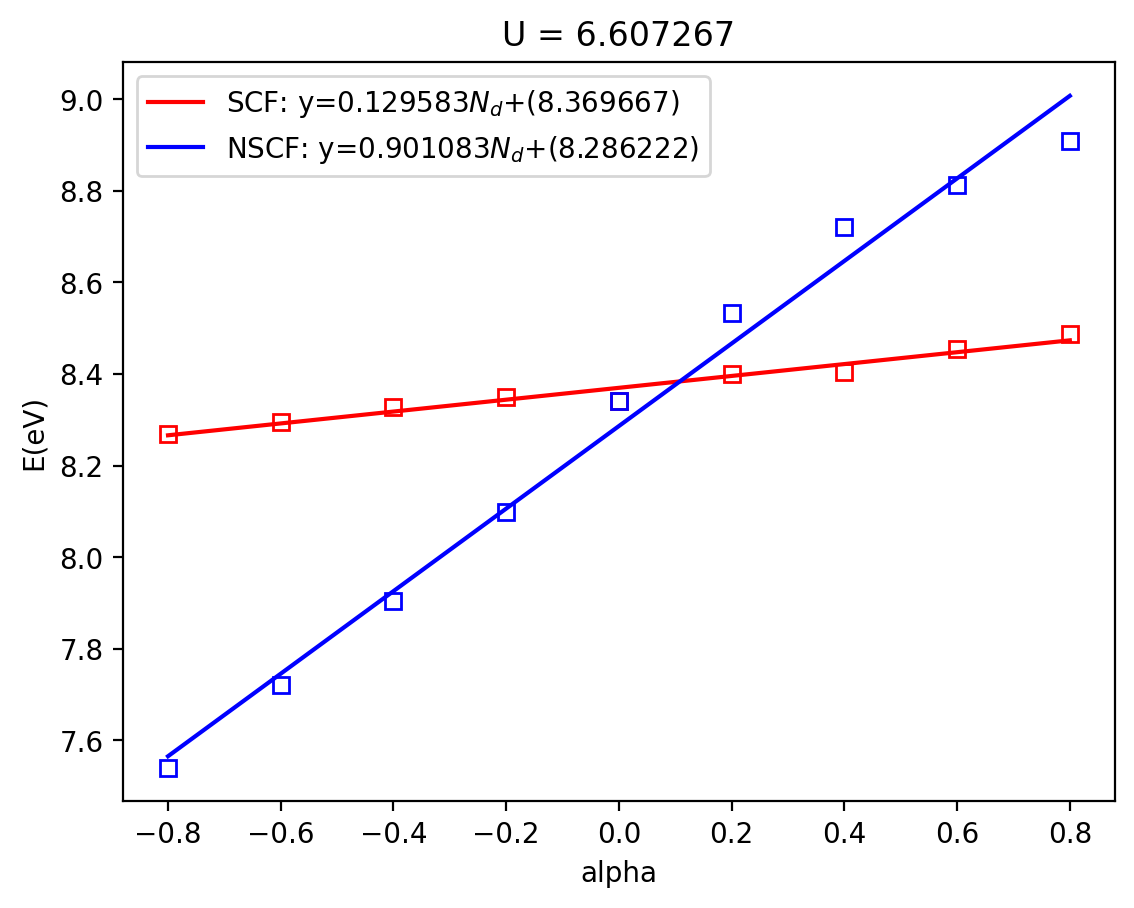

In [15]:
plt.plot(alphaListNum,scf, 's', color='red', markerfacecolor='none')
scffit = p1(alphaListNum)
plt.plot(alphaListNum,scffit, color='red', label="SCF: y=%.6f$N_d$+(%.6f)"%(z1[0],z1[1]))
plt.plot(alphaListNum,nscf, 's', color='blue', markerfacecolor='none')
nscffit = p2(alphaListNum)
plt.plot(alphaListNum,nscffit, color='blue', label="NSCF: y=%.6f$N_d$+(%.6f)"%(z2[0],z2[1]))
plt.title("U = %.6f"%U)
plt.xlabel("alpha")
plt.ylabel("E(eV)")
plt.legend()
plt.savefig("U.png", dpi=500)
plt.show()